Info about data - Source 

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import re
import seaborn as sns
from wordcloud import WordCloud
from pathlib import Path

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
rawd = pd.read_csv(r"D:\A.AI.ML\Projects\flipkart_sales\artefacts\raw\Flipkart_Mobiles.csv")
df = rawd.copy()

Checking the data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3114 entries, 0 to 3113
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           3114 non-null   object 
 1   Model           3114 non-null   object 
 2   Color           3114 non-null   object 
 3   Memory          3071 non-null   object 
 4   Storage         3075 non-null   object 
 5   Rating          2970 non-null   float64
 6   Selling Price   3114 non-null   int64  
 7   Original Price  3114 non-null   int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 194.8+ KB


* Records 3114
* Columns 8 
* Brand, Model, Color, Memory, Storage - Object 
* Memory and Storage should possibly be Int
* Memory (1.38%), Storage(1.25%) and Rating(4.62%) have missing values 


In [36]:
df.duplicated().sum()

108

In [38]:
df.drop_duplicates(inplace = True)

In [39]:
df[['Brand', 'Model', 'Color', 'Memory', 'Storage']].head()

,Brand,Model,Color,Memory,Storage
0,OPPO,A53,Moonlight Black,4 GB,64 GB
1,OPPO,A53,Mint Cream,4 GB,64 GB
2,OPPO,A53,Moonlight Black,6 GB,128 GB
3,OPPO,A53,Mint Cream,6 GB,128 GB
4,OPPO,A53,Electric Black,4 GB,64 GB


* Memory and Storage could be converted into a common nummerical format. In our data we have more GB values compared t o MB for  Memory and Storage. Hence we will convert all MBs to corresponding GBs by dividing the values by 1024. 

Missing Values

In [40]:
df_non_miss = df.dropna().reset_index(drop = True)
df_non_miss = df_non_miss[['Memory', 'Storage', 'Rating', 'Selling Price']]

df_non_miss

,Memory,Storage,Rating,Selling Price
0,4 GB,64 GB,4.5,11990
1,4 GB,64 GB,4.5,11990
2,6 GB,128 GB,4.3,13990
3,6 GB,128 GB,4.3,13990
4,4 GB,64 GB,4.5,11990
...,...,...,...,...
2801,6 GB,128 GB,4.3,25990
2802,6 GB,128 GB,4.3,25489
2803,8 GB,128 GB,4.3,27239
2804,8 GB,128 GB,4.2,22989


In [41]:
df_non_miss.groupby('Memory')['Selling Price'].mean()

Memory
1 GB       12616.057592
1.5 GB     12928.793103
10 MB       2062.666667
100 MB      1949.000000
12 GB      63408.836364
128 MB      1450.000000
153 MB      1549.000000
16 GB     116999.000000
16 MB       3080.166667
2 GB       17367.317549
2 MB        2299.500000
3 GB       18077.742358
30 MB       3400.000000
32 MB       2842.857143
4 GB       19988.885222
4 MB        1801.513514
46 MB       2949.500000
4GB        94449.104762
512 MB      6264.217391
6 GB       25085.000000
64 MB       3496.285714
768 MB      6854.833333
8 GB       33334.683230
8 MB        2461.555556
Name: Selling Price, dtype: float64

In [42]:
df_non_miss.groupby('Storage')['Selling Price'].mean()

Storage
1 TB                     167915.000000
10 MB                      1599.000000
100 MB                     2724.000000
128 GB                    29306.058739
128 MB                     3468.272727
129 GB                    22427.000000
130 GB                    22549.500000
140 MB                     5999.000000
153 MB                     1549.000000
16 GB                     12939.987097
16 MB                      2389.444444
2 MB                       2460.653846
256 GB                    63496.958974
256 MB                     6597.500000
32 GB                     14436.969754
4 GB                       7582.303571
4 MB                       1732.000000
512 GB                   123133.138889
512 MB                     3599.500000
64 GB                     20773.750681
64 MB                      3430.000000
8 GB                       8309.330827
8 MB                       1612.500000
Expandable Upto 16 GB      2717.714286
Expandable Upto 32 GB      3861.400000
Name: Selling Pri

In [43]:
df_non_miss.groupby('Rating')['Selling Price'].mean()

Rating
2.3     11999.000000
2.4     14939.000000
2.7      9627.000000
2.8      9306.000000
3.0     60739.666667
3.1      7070.000000
3.2     17949.333333
3.3     11770.500000
3.4      6029.666667
3.5      8360.470588
3.6      9193.088235
3.7      9941.523077
3.8     10566.401786
3.9     13176.583333
4.0     14621.922705
4.1     13388.826446
4.2     14184.903846
4.3     19178.959276
4.4     23437.310484
4.5     34940.989726
4.6     74852.815789
4.7    126317.795455
4.8     17499.000000
4.9     22990.000000
5.0     36849.833333
Name: Selling Price, dtype: float64

In [44]:
df[df['Rating'].isnull()]['Selling Price'].mean()

63093.06153846154

In [45]:
df_non_miss['Selling Price'].describe() #68% of the data lies between mean+std and mean-std 

count      2806.000000
mean      23910.539558
std       25666.067716
min        1000.000000
25%        9900.000000
50%       14999.000000
75%       25999.000000
max      179900.000000
Name: Selling Price, dtype: float64

<AxesSubplot:xlabel='Selling Price'>

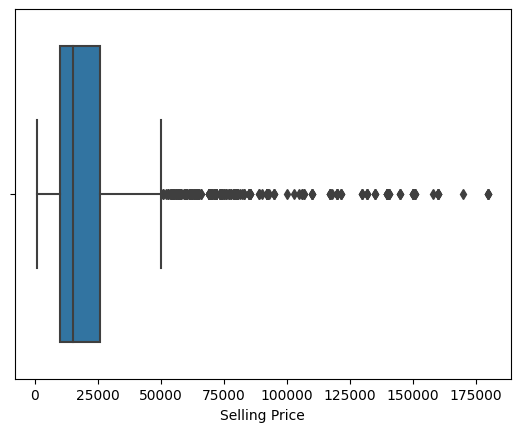

In [46]:
sns.boxplot(df_non_miss['Selling Price'])

In [48]:
df_non_miss['Rating'].mean() #Basic handling of nulls 

4.233820384889522

In [ ]:
## Normal Imputing 
## Average Imputing 
## KNN Imputing 
## Iterative Imputer
## Dropping

In [49]:
df['Color'].


,Brand,Model,Color,Memory,Storage,Rating,Selling Price,Original Price
0,OPPO,A53,Moonlight Black,4 GB,64 GB,4.5,11990,15990
1,OPPO,A53,Mint Cream,4 GB,64 GB,4.5,11990,15990
2,OPPO,A53,Moonlight Black,6 GB,128 GB,4.3,13990,17990
3,OPPO,A53,Mint Cream,6 GB,128 GB,4.3,13990,17990
4,OPPO,A53,Electric Black,4 GB,64 GB,4.5,11990,15990
...,...,...,...,...,...,...,...,...
3109,SAMSUNG,M52 5G,Blazing Black,6 GB,128 GB,4.3,25990,25990
3110,SAMSUNG,M52 5G,Icy Blue,6 GB,128 GB,4.3,25489,28449
3111,SAMSUNG,M52 5G,Icy Blue,8 GB,128 GB,4.3,27239,31489
3112,SAMSUNG,M52 5G,Slate Black,8 GB,128 GB,4.2,22989,22989


### Observation Folowchart 

* Clean column names and make it useful
* Info
* Duplicates
* Missing Value - Identification 
* Seprate Column type - cat, num - descrete and continuous, boolean, text, datetime
* All features above, take .info and .describe 
* Corresponding plots 
* Outliers Observation 


### Feature Engineering

* Based on the inferences and observation made above, make functions to handle data - This includes handling Missing values, Outliers, encoding of categorical variables etc etc
* Split and scale data - standard scaling 

### Modelling 

* Apply various models and get the best model performace - The best one will be selected for the final python script. 